In [24]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Load the diabetes dataset
data = load_breast_cancer()

# Create a DF
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# Check for missing values
print(df.isnull().any().sum())

# Use the same code if there is nans, but remove the any so you can see in which column there is the empty value
# If there are nan, you might consider removing the row or fill with the mean or median

0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


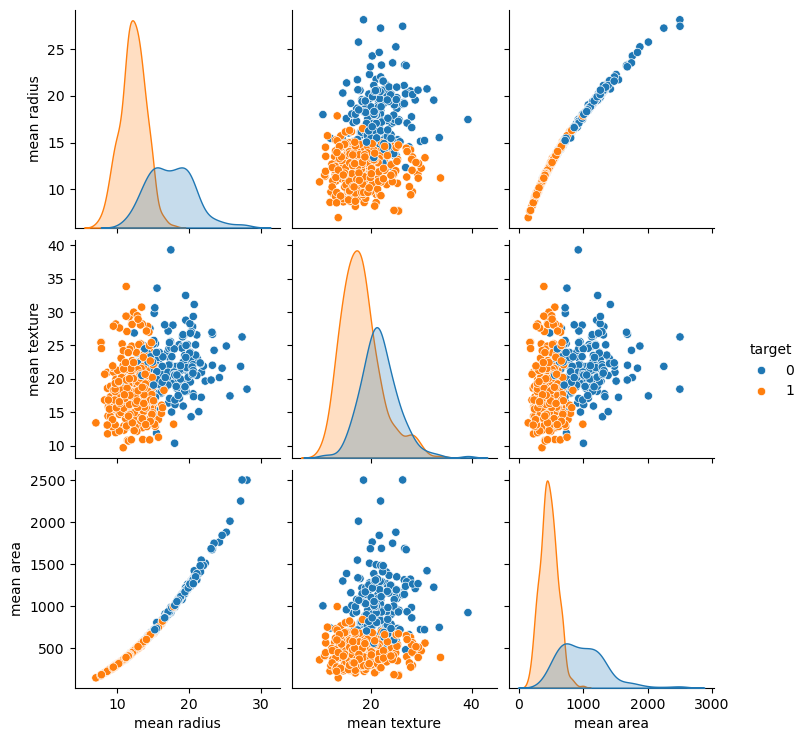

In [6]:
# Pairplot of the dataset
sns.pairplot(df, vars=['mean radius', 'mean texture', 'mean area'], hue='target')
plt.show()

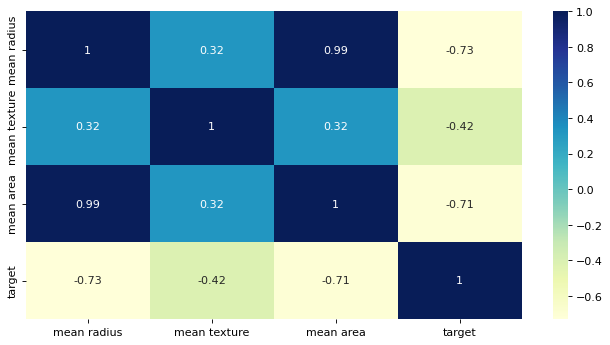

In [7]:
# Compute the correlation matrix
corr_matrix = df[['mean radius', 'mean texture', 'mean area', 'target']].corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 5), dpi=80)
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

In [8]:
df.target.value_counts()
# it shows unbalanced data... maybe we will need to balance it

target
1    357
0    212
Name: count, dtype: int64

In [9]:
# Define features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [10]:
# Scale the features
# Feature scaling ensures that all features contrinute equally to the model, 
# preventing features with larger scales from skewing the model

# Create the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Create the model
model = LogisticRegression()

# Fit the model
model.fit(X_train_scaled, y_train)

# Display the coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: [0.41998196]
Coefficients: [[-0.46366474 -0.31055751 -0.45862338 -0.52464981 -0.17097455  0.12330658
  -0.95826621 -0.81006615 -0.34834551  0.3240233  -0.74707247  0.63003665
  -0.3928635  -0.74369281 -0.39832283  0.67680208 -0.42132889  0.03771344
   0.22233808  0.79657665 -1.25385989 -1.51401877 -1.097074   -1.17609385
  -0.6615724   0.09681111 -0.93150875 -0.91562477 -0.6615564  -0.17624976]]


In [12]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [13]:
# Calculate accurary
accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate tclassification report
class_report = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy: 0.9649122807017544
Confusion Matrix:
 [[36  3]
 [ 1 74]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.95        39
           1       0.96      0.99      0.97        75

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



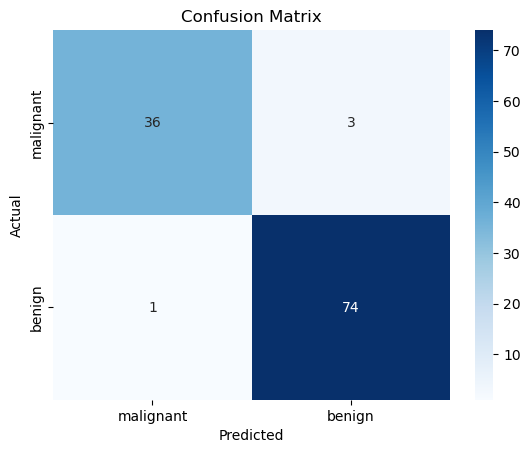

In [14]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
#maybe we can improve the recall balancing the dataset... because we don't want to classify a maligns cancer as benign
model = LogisticRegression(class_weight='balanced')

# Fit the model
model.fit(X_train_scaled, y_train)

# Display the coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: [0.06607747]
Coefficients: [[-0.43678508 -0.287271   -0.43782576 -0.49637869 -0.15204847  0.12915924
  -0.96760554 -0.80316255 -0.38177513  0.35303691 -0.75178611  0.67918217
  -0.38711823 -0.73821673 -0.41527237  0.6683329  -0.40083714  0.0653559
   0.22883922  0.80794731 -1.2853426  -1.5503353  -1.12433012 -1.18712731
  -0.61748327  0.06463537 -0.91467097 -0.95579776 -0.61474553 -0.23044456]]


In [16]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [17]:
# Calculate accurary
accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate tclassification report
class_report = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy: 0.9649122807017544
Confusion Matrix:
 [[36  3]
 [ 1 74]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.95        39
           1       0.96      0.99      0.97        75

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [18]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority') 
X , y= smote.fit_resample(X,y)
y.value_counts()

Looking in indexes: https://artifacts.dell.com/artifactory/api/pypi/python/simple, https://artifacts.dell.com/artifactory/api/pypi/ailfc-1003745-pypi-prd-local/simple, https://artifacts.dell.com/artifactory/api/pypi/aia-1001238-pypi-prd-local/simple, https://artifacts.dell.com/artifactory/api/pypi/aiops-1002685-pypi-prd-local/simple


target
0    357
1    357
Name: count, dtype: int64

In [19]:
# Define features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Scale the features
# Feature scaling ensures that all features contrinute equally to the model, 
# preventing features with larger scales from skewing the model

# Create the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the model
model = LogisticRegression()

# Fit the model
model.fit(X_train_scaled, y_train)

# Display the coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate accurary
accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate tclassification report
class_report = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

(455, 30) (114, 30) (455,) (114,)
Intercept: [0.41998196]
Coefficients: [[-0.46366474 -0.31055751 -0.45862338 -0.52464981 -0.17097455  0.12330658
  -0.95826621 -0.81006615 -0.34834551  0.3240233  -0.74707247  0.63003665
  -0.3928635  -0.74369281 -0.39832283  0.67680208 -0.42132889  0.03771344
   0.22233808  0.79657665 -1.25385989 -1.51401877 -1.097074   -1.17609385
  -0.6615724   0.09681111 -0.93150875 -0.91562477 -0.6615564  -0.17624976]]
Accuracy: 0.9649122807017544
Confusion Matrix:
 [[36  3]
 [ 1 74]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.95        39
           1       0.96      0.99      0.97        75

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
# use AUC as evaluation metric for cross-validation 
from sklearn.model_selection import cross_val_score 
logreg = LogisticRegression() 
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean() 

In [32]:
dt = DecisionTreeClassifier()
parameters = {"max_depth":[1, 2, 3, 4, 5, 7, 10],  
              "min_samples_leaf": [1, 3, 6, 10, 20]}
clf = GridSearchCV(dt, parameters, n_jobs= 1)
clf.fit(X_train_scaled, y_train)
print(clf.best_params_)

{'max_depth': 4, 'min_samples_leaf': 1}


In [33]:
y_train_pred=clf.predict(X_train_scaled)
y_test_pred=clf.predict(X_test_scaled)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print(f'Decision tree train accuracy: {tree_train:.3f}')
print(f'Decision tree test accuracy: {tree_test:.3f}')

Decision tree train accuracy: 0.996
Decision tree test accuracy: 0.939


In [34]:

# Calculate accurary
accuracy = accuracy_score(y_test, y_test_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Calculate tclassification report
class_report = classification_report(y_test, y_test_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy: 0.9385964912280702
Confusion Matrix:
 [[34  5]
 [ 2 73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.91        39
           1       0.94      0.97      0.95        75

    accuracy                           0.94       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

